## Importing Needed Libraries

In [74]:
import requests      # Requests data from an API
import json          # Handles JSON object
import jmespath      # Allows you to mor easily navigate JSON objects
import pandas as pd  # Handles data frames
import matplotlib.pyplot as plt


## Reviewing Structure

In [66]:
# URL for titles with artificial intelligence in them 
url_ai_works_test = \
      "https://api.openalex.org/works?filter=title.search:artificial%20intelligence"

# Obtain the JSON data of records from the open alex API
search_results_ai_works_test = requests.\
    get(url_ai_works_test).json()


In [67]:
# Write the file into a JSON file to easily view structure 
with open('json_files/search_results_ai_works_test.json', 'w') as file: 
    file.write(json.dumps(search_results_ai_works_test, indent =4))

## Pulling Needed Data for Questions 1-3

In [44]:
# Define the base URL
url_ai_works = "https://api.openalex.org/works?filter=title.search:artificial%20intelligence"

# Set records per page
per_page = 200

# Empty dataframe for data 
data = []

# Initialize cursor with first page 
cursor = '*'

# Use while loop to go through each batch of results 
while cursor:
    # Get the results using cursor pagination
    search_results_temp = requests.get(f"{url_ai_works}&per-page={per_page}&cursor={cursor}").json()

    # Check if 'results' exists in search_results_temp
    if 'results' not in search_results_temp:
        print(f"No 'results' key found in search_results_temp, breaking loop. Full search_results_temp: {search_results_temp}")
        break

    # Process the current batch of results
    for work in search_results_temp['results']:
        work_id = work.get('id', 'N/A')
        title = work.get('title', 'N/A')
        display_name = work.get('display_name', 'N/A') 
        doi = work.get('doi', 'N/A')
        publication_date = work.get('publication_date', 'N/A')
        cited_by_count = work.get('cited_by_count', 'N/A')
        work_type = work.get('type', 'N/A')

        authors = []
        institutions = []
        countries = []

        if 'authorships' in work:
            for author in work['authorships']:
                authors.append(author['author']['display_name'])
                if 'institutions' in author:
                    for institution in author['institutions']:
                        institutions.append(institution.get('display_name', 'N/A'))
                if 'countries' in author:
                    for country in author['countries']:
                        countries.append(country)

        data.append({
            'ID': work_id,
            'Title': title,
            'Display Name': display_name, 
            'DOI': doi,
            'Publication Date': publication_date,
            'Cited By Count': cited_by_count,
            'Type': work_type,
            'Authors': ', '.join(authors),
            'Institutions': ', '.join(institutions),
            'Countries': ', '.join(countries)
        })

    # Check if there's a next cursor in the search_results_temp, break if not 
    if search_results_temp['meta']['next_cursor'] is None and not search_results_temp['results']:
        print("No more pages left.")
        break

    
    # Move to the next batch
    cursor = search_results_temp['meta']['next_cursor']

df_ai = pd.DataFrame(data)



No more pages left.


## Question 1

In [45]:
# Create a copy of the dataframe just in case 
df_ai_copy = df_ai.copy()

In [46]:
# Answer using dataframe created above 

total_ai_works = df_ai_copy.shape[0]
print("The number of works with 'artificial intelligence' in the title is {:,}".format(total_ai_works))

The number of works with 'artificial intelligence' in the title is 139,683


In [68]:
# Answer using meta['count'] (for validation)

total_ai_works_test = search_results_ai_works_test['meta']['count']
print("The number of works with 'artificial intelligence' in the title is {:,}".format(total_ai_works_test))

The number of works with 'artificial intelligence' in the title is 139,680


In [ ]:
# Notes: this was run on Oct 2nd ~5pm

#### Answer 
The number of works with 'artificial intelligence' in the title is 139,683 as of ~5pm on Oct 2nd. 

## Question 2

In [104]:
df_ai_copy['Type'].unique()

array(['article', 'book', 'review', 'book-chapter', 'paratext',
       'preprint', 'report', 'letter', 'editorial', 'dissertation',
       'other', 'reference-entry', 'erratum', 'dataset', 'standard',
       'grant', 'peer-review', 'retraction', 'libguides',
       'supplementary-materials'], dtype=object)

In [33]:
display(df_ai_copy)

,ID,Title,Display Name,DOI,Publication Date,Cited By Count,Type,Authors,Institutions,Countries,First_Author,First_Author_Country,First_Author_Inst,Publication_Year
0,https://openalex.org/W2122410182,Artificial intelligence: a modern approach,Artificial intelligence: a modern approach,https://doi.org/10.5860/choice.33-1577,1995-11-01,21917,article,"Stuart Russell, Peter Norvig","University of California, Berkeley, University...",None,Stuart Russell,None,University of California,1995
1,https://openalex.org/W1983362322,Artificial Intelligence: A Modern Approach,Artificial Intelligence: A Modern Approach,https://doi.org/10.1016/0925-2312(95)90020-9,1995-10-01,7575,article,Antoni Ligęza,AGH University of Krakow,None,Antoni Ligęza,None,AGH University of Krakow,1995
2,https://openalex.org/W26772505,Lecture Notes in Artificial Intelligence,Lecture Notes in Artificial Intelligence,None,1999-01-01,7382,article,"Patrick Brézillon, Paolo Bouquet",,None,Patrick Brézillon,None,,1999
3,https://openalex.org/W2152475379,Principles of Artificial Intelligence,Principles of Artificial Intelligence,https://doi.org/10.1007/978-3-662-09438-9,1982-01-01,3438,book,Nils J. Nilsson,SRI International,None,Nils J. Nilsson,None,SRI International,1982
4,https://openalex.org/W2531563875,Proceedings of the 19th International Joint Co...,Proceedings of the 19th International Joint Co...,None,2005-01-01,4580,article,"Josep M. Pujol, Jordi Delgado, Ramón Sangüesa,...",,None,Josep M. Pujol,None,,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139669,https://openalex.org/W4386856258,"Review for ""Time in range in patients with typ...","Review for ""Time in range in patients with typ...",https://doi.org/10.1111/dom.15280/v2/review1,2023-08-24,0,peer-review,,,None,,None,,2023
139670,https://openalex.org/W4386856276,"Review for ""Time in range in patients with typ...","Review for ""Time in range in patients with typ...",https://doi.org/10.1111/dom.15280/v2/review2,2023-08-27,0,peer-review,,,None,,None,,2023
139671,https://openalex.org/W4386856274,"Author response for ""Time in range in patients...","Author response for ""Time in range in patients...",https://doi.org/10.1111/dom.15280/v2/response1,2023-08-21,0,peer-review,"Kevin Jon Williams, Eran Bashan, Caitlin Kruse...",,None,Kevin Jon Williams,None,,2023
139672,https://openalex.org/W4386856275,"Review for ""Time in range in patients with typ...","Review for ""Time in range in patients with typ...",https://doi.org/10.1111/dom.15280/v1/review2,2023-08-01,0,peer-review,,,None,,None,,2023


In [69]:
# Creating a column for publication year 
df_ai_copy['Publication Date'] = pd.to_datetime(df_ai_copy['Publication Date'])
df_ai_copy['Publication_Year'] = df_ai_copy['Publication Date'].dt.year


# Creating columns with information about only the first offer for the analysis 
df_ai_copy['First_Author'] = df_ai_copy['Authors'].str.split(',').str[0]
df_ai_copy['First_Author_Inst'] = df_ai_copy['Institutions'].str.split(',').str[0]
df_ai_copy['First_Author_Country'] = df_ai_copy['Countries'].str.split(',').str[0]

# Where Countries is blank, let's change it to "Not Given"
df_ai_copy['First_Author_Country'] = df_ai_copy['First_Author_Country'].replace('', 'Not Given')



In [84]:
# Filter for publications since 2020
df_ai_filtered_2020 = df_ai_copy[df_ai_copy['Publication_Year'] >= 2020]

# Group by the country and count the number of publications
country_publications = df_ai_filtered_2020.groupby('First_Author_Country').agg(Publication_Count=('First_Author_Country', 'size')).reset_index()

# Sort by the number of publications in descending order
country_publications_sorted = country_publications.sort_values(by='Publication_Count', ascending=False).reset_index(drop = True)

# Renaming columns 
country_publications_renamed = country_publications_sorted.rename(columns={
    'First_Author_Country': 'Country',
    'Publication_Count': 'Publication Count'
})

# Applying formatting to publication count 
country_publications_renamed['Publication Count'] = country_publications_renamed['Publication Count'].apply(lambda x: f"{x:,}")


# Display the table
print(country_publications_renamed[['Country', 'Publication Count']].to_string(index=False))


  Country Publication Count
Not Given            31,353
       CN            12,024
       US            11,191
       IN             8,562
       GB             3,181
       DE             2,321
       IT             2,211
       RU             2,003
       CA             1,750
       KR             1,657
       TR             1,573
       AU             1,525
       ES             1,487
       ID             1,376
       FR             1,368
       JP             1,239
       BR               996
       SA               968
       IR               898
       TW               786
       NL               759
       MY               703
       PK               655
       PL               625
       RO               571
       CH               570
       EG               555
       PT               549
       UA               519
       GR               468
       AE               466
       SG               465
       MA               422
       NG               418
       ZA           

Findings 
- 31,353 publications did not have a country associated with the Author 

Let's remove these and format a nice table for the top 10 countries

In [85]:
# Dropping rows where the value is 'Country' is equal to 'Not Given' 
country_publications_nona = country_publications_renamed[country_publications_renamed['Country'] != 'Not Given']

# Filter to top 10 countries by publications 
country_publications_top10 = country_publications_nona.iloc[0:10,:]

In [83]:
country_publications.dtypes

First_Author_Country    object
Publication_Count        int64
dtype: object

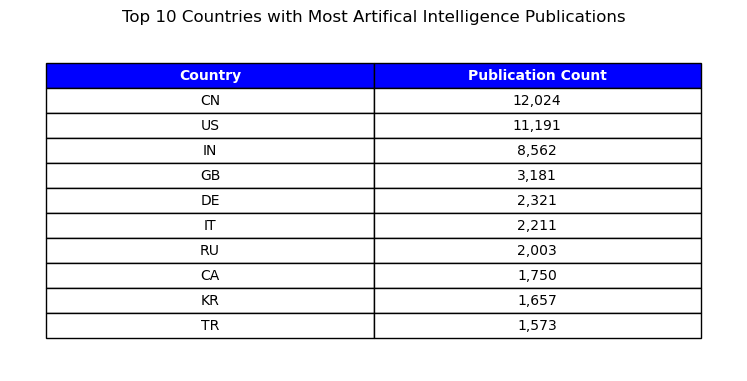

In [90]:
# Creating formatted table 
fig, list_subfig = plt.subplots(figsize = (8,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)


table = list_subfig.table(cellText=country_publications_top10.reset_index(drop = True).values, 
                  colLabels=country_publications_top10.columns, 
                  loc='center', cellLoc='center')

table.scale(0.9, 1.5)  # Adjust table size
list_subfig.axis('off')
list_subfig.set_title('Top 10 Countries with Most Artifical Intelligence Publications')


# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  

plt.show()

### Answer


In [91]:
# Display the table with all countries
print(country_publications_renamed[['Country', 'Publication Count']].to_string(index=False))

  Country Publication Count
Not Given            31,353
       CN            12,024
       US            11,191
       IN             8,562
       GB             3,181
       DE             2,321
       IT             2,211
       RU             2,003
       CA             1,750
       KR             1,657
       TR             1,573
       AU             1,525
       ES             1,487
       ID             1,376
       FR             1,368
       JP             1,239
       BR               996
       SA               968
       IR               898
       TW               786
       NL               759
       MY               703
       PK               655
       PL               625
       RO               571
       CH               570
       EG               555
       PT               549
       UA               519
       GR               468
       AE               466
       SG               465
       MA               422
       NG               418
       ZA           

Findings 
- From the table with all countries (including "Not Given"), we can see that many publications did not have a country associated with the author 
- Excluding "Not Given", we can see that China had the most publications with ~12k followed by the United States with ~11k


## Question 3

In [107]:
# 
papers_cited = df_ai_filtered_2020.groupby(['Title', 'Authors', 'Institutions']).agg(Citations=('Cited By Count', 'sum')).reset_index()

papers_cited_sorted = papers_cited.sort_values(by='Citations', ascending=False).reset_index(drop = True)

# Applying formatting to citation sum 
papers_cited_sorted['Citations'] = papers_cited_sorted['Citations'].apply(lambda x: f"{x:,}")


# Filter to top 10 works by publications 
papers_cited_top10 = papers_cited_sorted.iloc[0:10,:]



In [108]:
# Displaying table of top 10 
pd.set_option('display.max_colwidth', None)  # Show full content of columns
display(papers_cited_top10)

,Title,Authors,Institutions,Citations
0,Using Artificial Intelligence to Detect COVID-19 and Community-acquired Pneumonia Based on Pulmonary CT: Evaluation of the Diagnostic Accuracy,"Lin Li, Lixin Qin, Zeguo Xu, Youbing Yin, Xin Wang, Bin Kong, Junjie Bai, Yi Lu, Zhenghan Fang, Qi Song, Kunlin Cao, Daliang Liu, Guisheng Wang, Qizhong Xu, Xisheng Fang, Shiqin Zhang, Juan Xia, Jun Xia","Jianghan University, Wuhan Pulmonary Hospital, Liaocheng People's Hospital, Chinese PLA General Hospital, Shenzhen University Health Science Center, Shenzhen Second People's Hospital","1,851"
1,The role of artificial intelligence in achieving the Sustainable Development Goals,"Ricardo Vinuesa, Hossein Azizpour, Iolanda Leite, Madeline Balaam, Virginia Dignum, Sami Domisch, Anna Felländer, Simone D. Langhans, Max Tegmark, Francesco Fuso Nerini","Swedish e-Science Research Centre, KTH Royal Institute of Technology, KTH Royal Institute of Technology, KTH Royal Institute of Technology, Umeå University, Leibniz Institute of Freshwater Ecology and Inland Fisheries, Basque Centre for Climate Change, Massachusetts Institute of Technology, KTH Royal Institute of Technology","1,502"
2,"Review of Artificial Intelligence Techniques in Imaging Data Acquisition, Segmentation, and Diagnosis for COVID-19","Feng Shi, Jun Wang, Jun Shi, Ziyan Wu, Qian Wang, Zhenyu Tang, Kelei He, Yinghuan Shi, Dinggang Shen","United Imaging Healthcare (China), Shanghai University, Shanghai University, Shanghai Jiao Tong University, Beijing Advanced Sciences and Innovation Center, Beihang University, Nanjing University, Nanjing Medical University, Nanjing University, United Imaging Healthcare (China)","1,296"
3,Artificial Intelligence (AI) applications for COVID-19 pandemic,"Raju Vaishya, Mohd Javaid, Ibrahim Haleem Khan, Abid Haleem","Indraprastha Apollo Hospitals, Jamia Millia Islamia, Northeastern University, Jamia Millia Islamia","1,261"
4,A Survey on Explainable Artificial Intelligence (XAI): Toward Medical XAI,"Erico Tjoa, Cuntai Guan","Nanyang Technological University, Alibaba Group (China), Alibaba Group (China), Nanyang Technological University","1,168"
5,Artificial Intelligence in Education: A Review,"Lijia Chen, Pingping Chen, Zhijian Lin","Yango University, Fuzhou University, Fuzhou University","1,134"
6,Photonics for artificial intelligence and neuromorphic computing,"Bhavin J. Shastri, Alexander N. Tait, Thomas Ferreira de Lima, Wolfram H. P. Pernice, Harish Bhaskaran, C. David Wright, Paul R. Prucnal","Queen's University, Princeton University, Princeton University, University of Münster, University of Oxford, University of Exeter, Princeton University","1,023"
7,Artificial intelligence–enabled rapid diagnosis of patients with COVID-19,"Xueyan Mei, Hao-Chih Lee, Kaiyue Diao, Mingqian Huang, Bin Lin, Chenyu Liu, Zongyu Xie, Yixuan Ma, Philip M. Robson, Michael Chung, Adam Bernheim, Venkatesh Mani, Claudia Calcagno, Kunwei Li, Shaolin Li, Hong Shan, Jian Lv, Tongtong Zhao, Junli Xia, Qihua Long, Sharon Steinberger, Adam Jacobi, Timothy Deyer, Marta Łuksza, Fang Liu, Brent P. Little, Zahi A. Fayad, Yang Yang","Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Sichuan University, West China Hospital of Sichuan University, Icahn School of Medicine at Mount Sinai, Second Affiliated Hospital of Zhejiang University, Icahn School of Medicine at Mount Sinai, First Affiliated Hospital of Bengbu Medical College, Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Icahn School of Medicine at Mount Sinai, Sun Yat-sen University, Fifth Affiliated Hospital of Sun Yat-sen University, Sun Yat-sen University, Fifth Affiliated Hospital of Sun Yat-sen University, Sun Yat-sen University, Fifth Affiliated Hospital of Sun Yat-sen University, Fuyang Second People's Hospital, Bozhou People's Hospital, Wuhan Uni

## Answers 

The top 10 most cited works on artificial intelligence are:
- __Using Artificial Intelligence to Detect COVID-19 and Community-acquired Pneumonia Based on Pulmonary CT: Evaluation of the Diagnostic Accuracy__
    - _Citations:_ 1,851
    - _Authors:_ Lin Li, Lixin Qin, Zeguo Xu, Youbing Yin, Xin Wang, Bin Kong, Junjie Bai, Yi Lu, Zhenghan Fang, Qi Song, Kunlin Cao, Daliang Liu, Guisheng Wang, Qizhong Xu, Xisheng Fang, Shiqin Zhang, Juan Xia, Jun Xia
    - _Institutions:_ Jianghan University, Wuhan Pulmonary Hospital, Liaocheng People's Hospital, Chinese PLA General Hospital, Shenzhen University Health Science Center, Shenzhen Second People's Hospital
- __The role of artificial intelligence in achieving the Sustainable Development Goals__
    - _Citations:_ 1,502
    - _Authors:_ Ricardo Vinuesa, Hossein Azizpour, Iolanda Leite, Madeline Balaam, Virginia Dignum, Sami Domisch, Anna Felländer, Simone D. Langhans, Max Tegmark, Francesco Fuso Nerini
    - _Institutions:_ Swedish e-Science Research Centre, KTH Royal Institute of Technology, KTH Royal Institute of Technology, KTH Royal Institute of Technology, Umeå University, Leibniz Institute of Freshwater Ecology and Inland Fisheries, Basque Centre for Climate Change, Massachusetts Institute of Technology, KTH Royal Institute of Technology
     